# Reference
https://pyimagesearch.com/2014/11/24/detecting-barcodes-images-python-opencv/

In [378]:
import cv2
import numpy as np
import imutils

from matplotlib import pyplot as plt

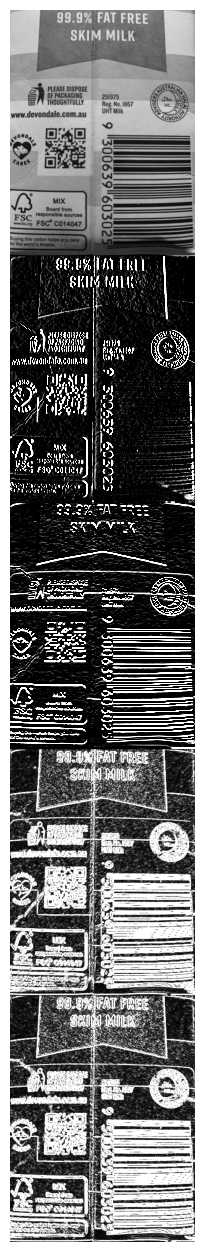

In [379]:
image = cv2.imread('../resources/barcode_sample2.jpg')
image = imutils.resize(image, height=500)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# find the edge
gray_x = cv2.Sobel(gray, ddepth=cv2.CV_32F, dx=1, dy=0, ksize=-1)
gray_y = cv2.Sobel(gray, ddepth=cv2.CV_32F, dx=0, dy=1, ksize=-1)
gray_xy =  cv2.addWeighted(gray_x, 1, gray_y, 1, 0)

# gradient_xy and gradient has similar result
gradient = cv2.subtract(gray_x, gray_y)
gradient = cv2.convertScaleAbs(gradient)
gradient_xy = cv2.convertScaleAbs(gray_xy)


plt.figure(figsize=(16,16))
plt.axis('off')
plt.imshow(np.vstack([
    gray,
    gray_x,
    gray_y,
    gradient_xy,
    gradient
]), cmap=plt.cm.gray, vmin=0, vmax=255)

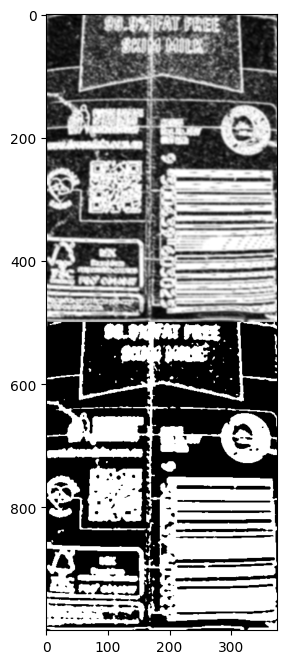

In [380]:
blur = cv2.GaussianBlur(gradient, (7,7), 0)

# thresh = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 21, 2)
thresh = cv2.threshold(blur, 255, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
#


plt.figure(figsize=(10, 8))
plt.imshow(np.vstack([
    blur,
    thresh
]), cmap=plt.cm.gray)


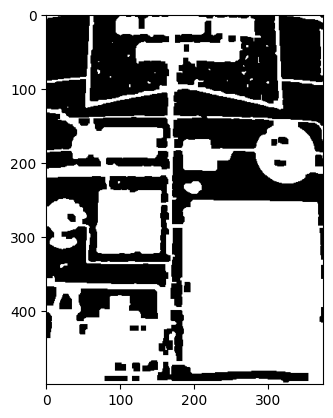

In [381]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7,7))
closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

plt.imshow(closed, cmap=plt.cm.gray)

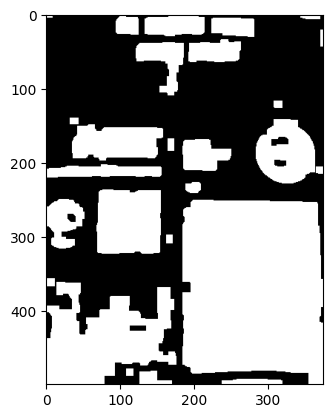

In [382]:
erode = cv2.erode(closed, None, iterations=4)
dilate = cv2.dilate(erode, None, iterations=4)

plt.imshow(dilate, cmap=plt.cm.gray)

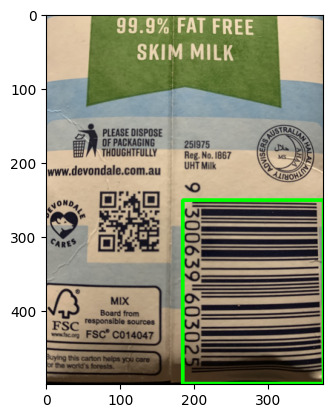

In [383]:
cnts = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
cnts = imutils.grab_contours(cnts)
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)[0]

rect = cv2.minAreaRect(cnts)
box = cv2.boxPoints(rect)
box = np.array(box, dtype=np.int0)

img = image.copy()
cv2.drawContours(img, [box], -1, (0,255,0), 3)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))